In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

from marketenvironment import MarketEnvironment

In [2]:
def plot_q_tables(agent):
    states = [
        "(loss;empty_market)",
        "(loss;some_jobs)",
        "(loss;full_market)",
        "(break_even;empty_market)",
        "(break_even;some_jobs)",
        "(break_even;full_market)",
        "(profit;empty_market)",
        "(profit;some_jobs)",
        "(profit;full_market)"
    ]

    actions = ["list_job", "self_processing", "bid_0.25",
               "bid_0.5", "bid_0.75", "bid_1.0"]

    plt.figure(figsize=(10, 6))

    ax = sns.heatmap(
        agent.q_table,
        annot=True,
        cmap="RdYlGn",
        center=0,
        cbar=True
    )

    ax.set_xticklabels(actions, rotation=45)
    ax.set_yticklabels(states, rotation=0)
    plt.show()


In [3]:
def plot_rewards(rewards):
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))

    steps = sorted(rewards.keys())
    
    inner_dict = rewards[steps[0]]
    rz_keys = [key for key in inner_dict.keys() if key.startswith("RZ")]

    palette = sns.color_palette("tab10", n_colors=len(rz_keys))

    for rz, color in zip(rz_keys, palette):
        y = [rewards[s][rz] for s in steps]
        plt.plot(steps, y, label=rz, color=color, linewidth=2)
    
    mean = [rewards[step]["mean_reward"] for step in steps]
    plt.plot(
        steps, mean,
        label="mean_reward",
        linestyle="--",
        color="black",
        linewidth=3
    )

    social_welfare = [rewards[step]["social_welfare"] for step in steps]
    plt.plot(
        steps, social_welfare,
        label="social_welfare",
        linestyle="--",
        color="gray",
        linewidth=1.5
    )

    plt.xlabel("Step")
    plt.ylabel("Reward")
    plt.title("Agent Rewards Over Time")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [4]:
def plot_reward_for(agent_name, rewards):
    sns.set_style("whitegrid")
    plt.figure(figsize=(12, 6))

    steps = sorted(rewards.keys())
    
    y = [rewards[s][agent_name] for s in steps]
    plt.plot(steps, y, label=agent_name, color="blue", linewidth=2)
    
    plt.xlabel("Step")
    plt.ylabel("Reward")
    plt.title(f"Reward Over Time for {agent_name}")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [5]:
def run_episode(sim_env: MarketEnvironment, max_steps: int):
    states = sim_env.reset()
    done = False
    step_count = 0

    rewards_info = {}

    while not done and step_count < max_steps:
        # print(f"--- Step {step_count} ---")
        actions = {}
        for agent in sim_env.agents.values():
            actions[agent.name] = agent.choose_action(states[agent.name])

        next_state, rewards, done, info = sim_env.step(actions)

        rewards_info[step_count] = rewards
        rewards_info[step_count]['mean_reward'] = sum(rewards.values()) / len(rewards.keys())
        rewards_info[step_count]['social_welfare'] = sum(rewards.values())

        for agent in sim_env.agents.values():
            agent.learn(
                states[agent.name], actions[agent.name],
                rewards[agent.name], next_state[agent.name]
            )

        states = next_state
        step_count += 1

    return sim_env, rewards_info

In [6]:
sim_env = MarketEnvironment()
# steps = 24 * 365 * 10
steps = 10000
print(f"Running simulation for {steps} steps...")
sim_env, rewards_info = run_episode(sim_env=sim_env, max_steps=steps)

Running simulation for 10000 steps...


Plotting Q-Tables
Agent RZ1


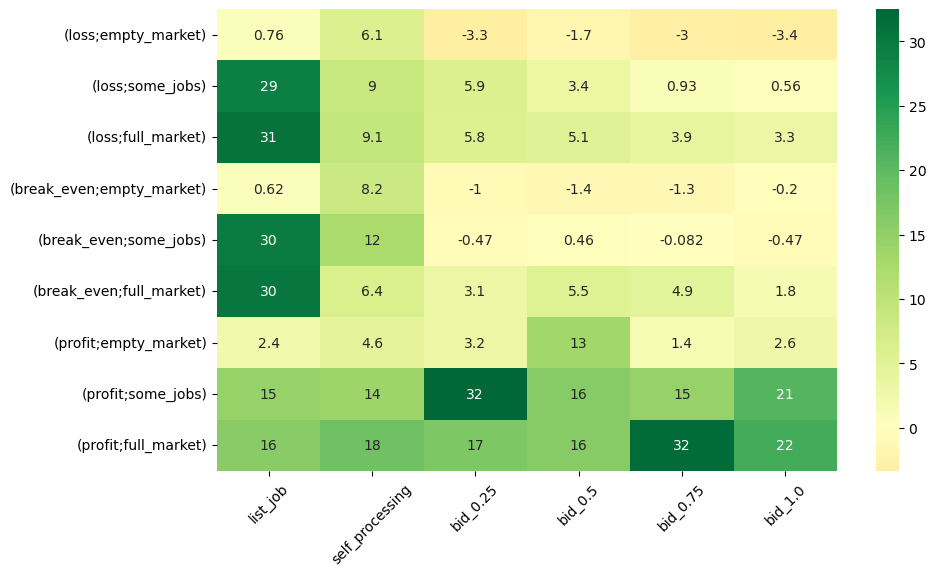

Agent RZ2


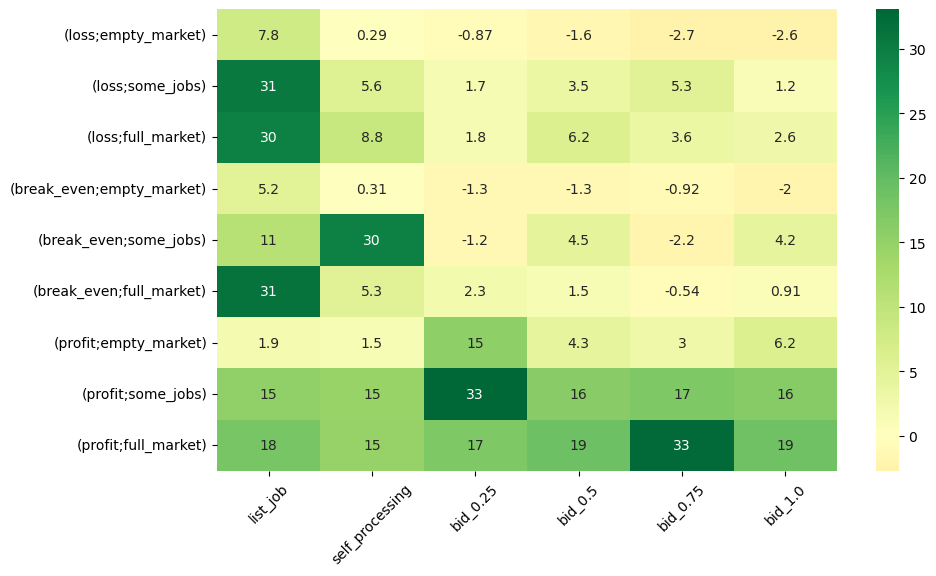

Agent RZ3


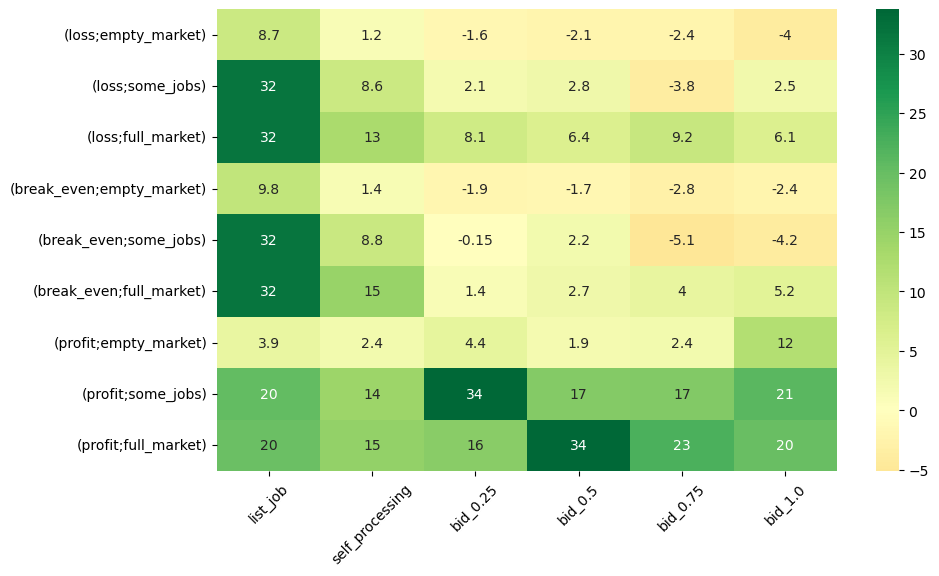

Agent RZ4


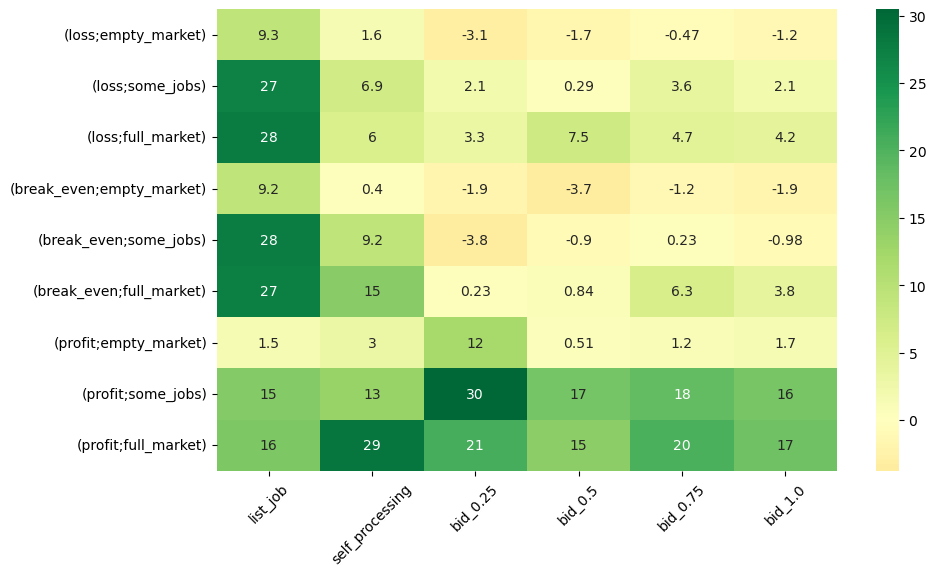

Agent RZ5


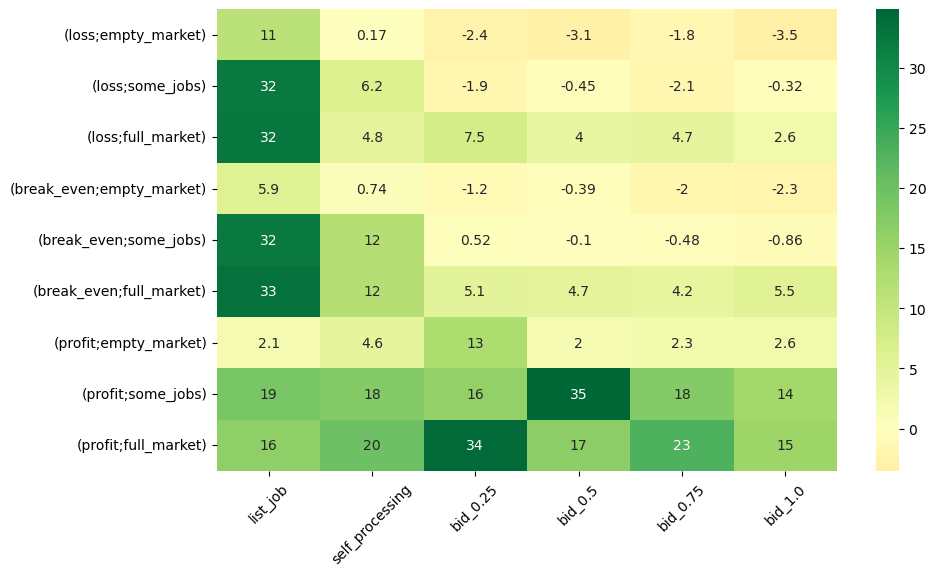

Agent RZ6


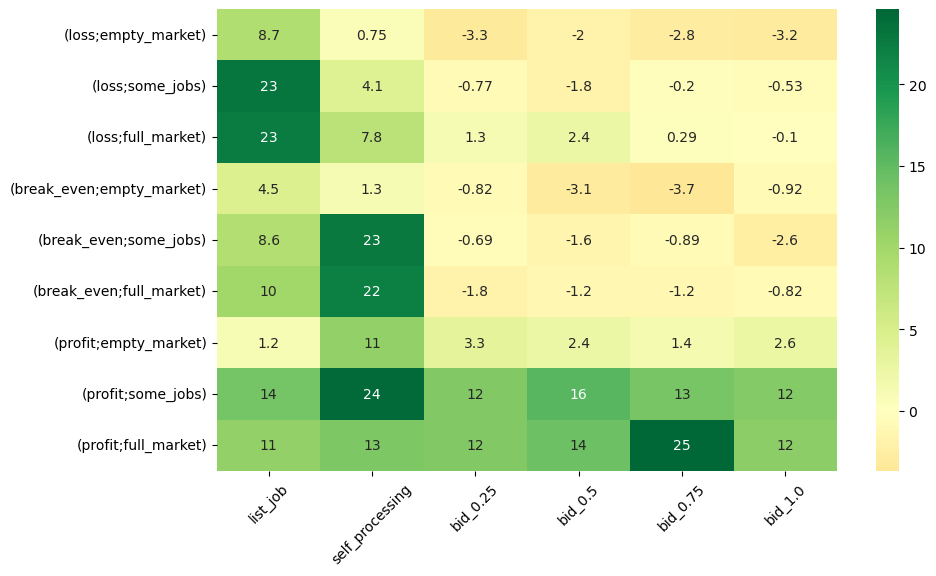

Plotting Rewards


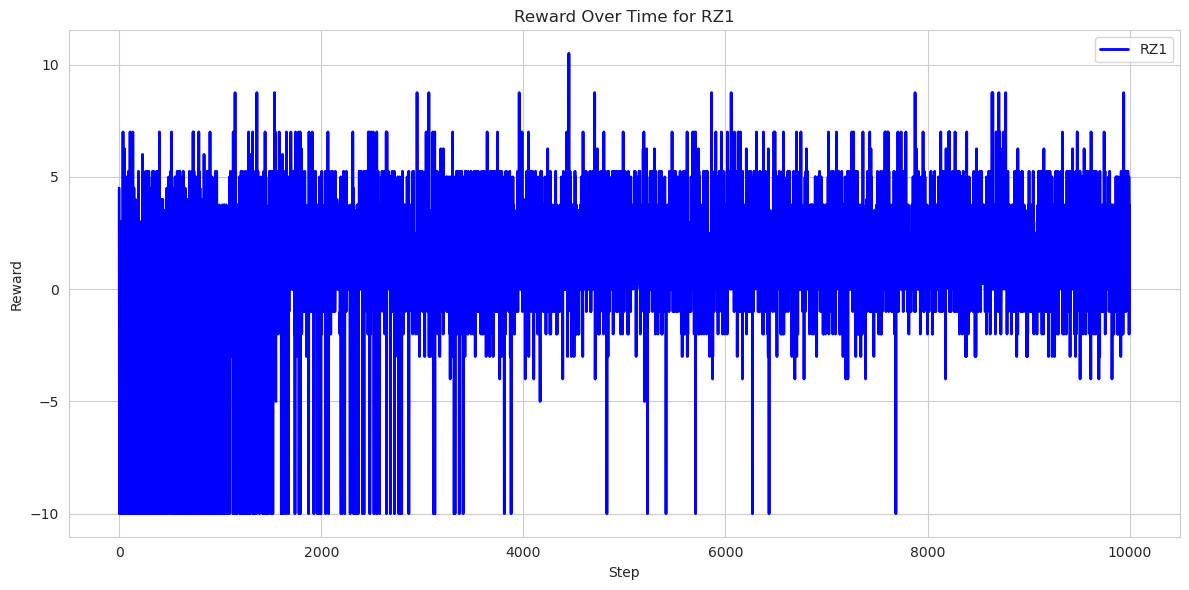

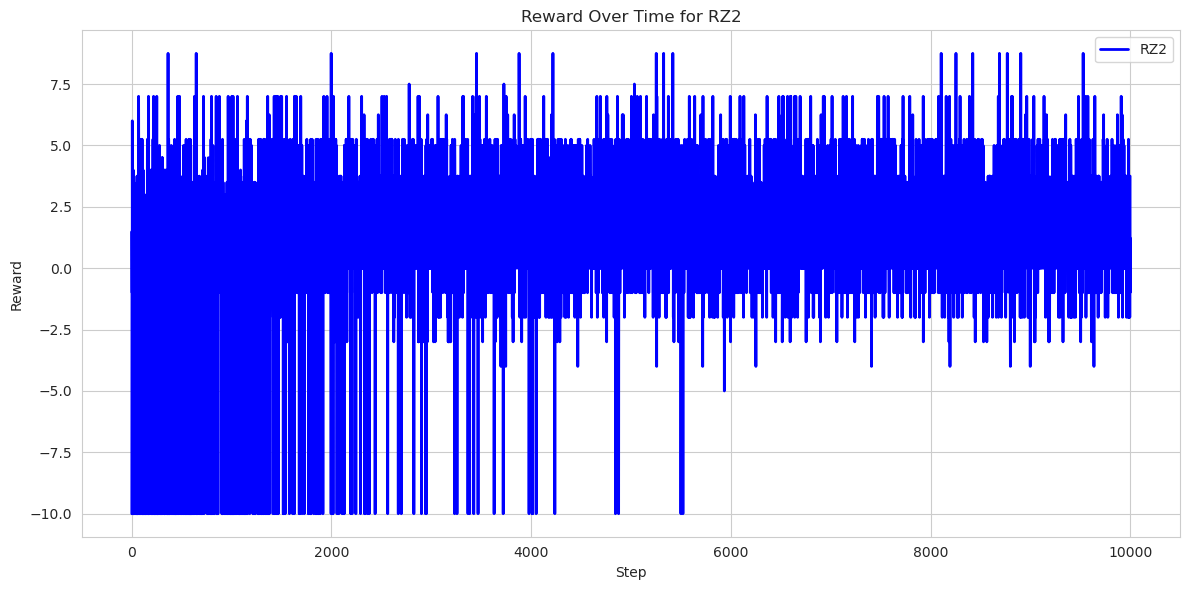

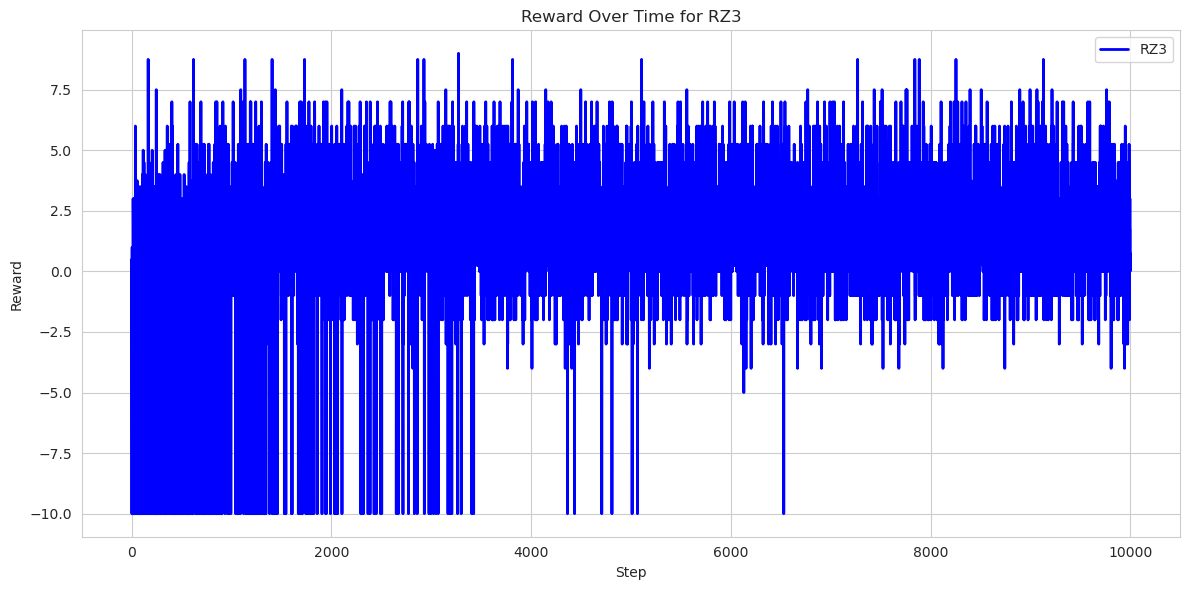

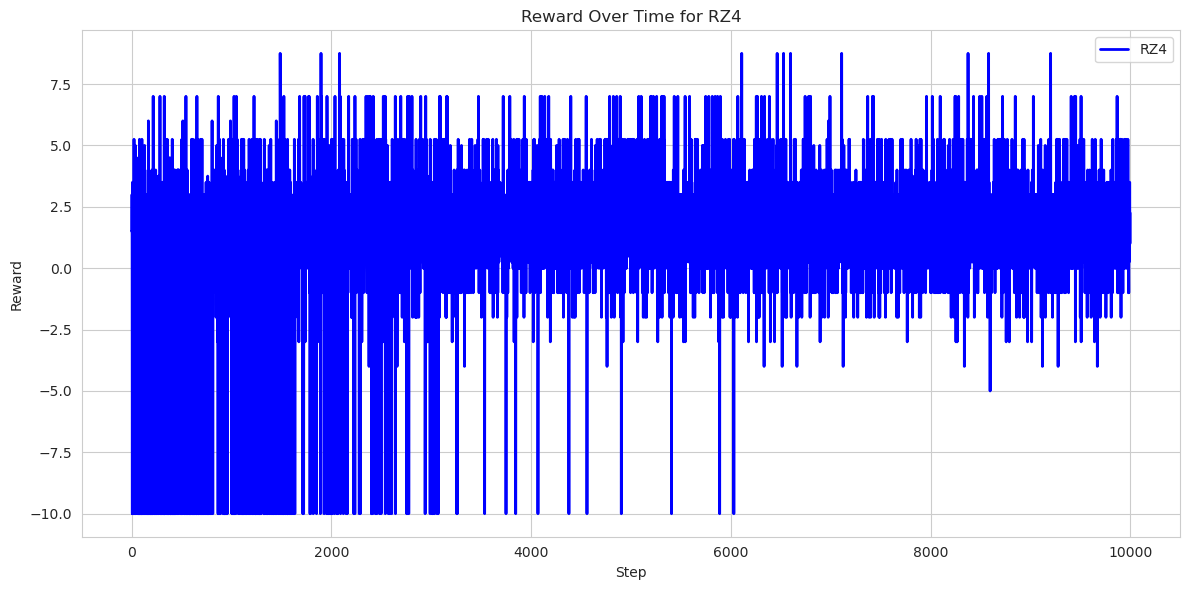

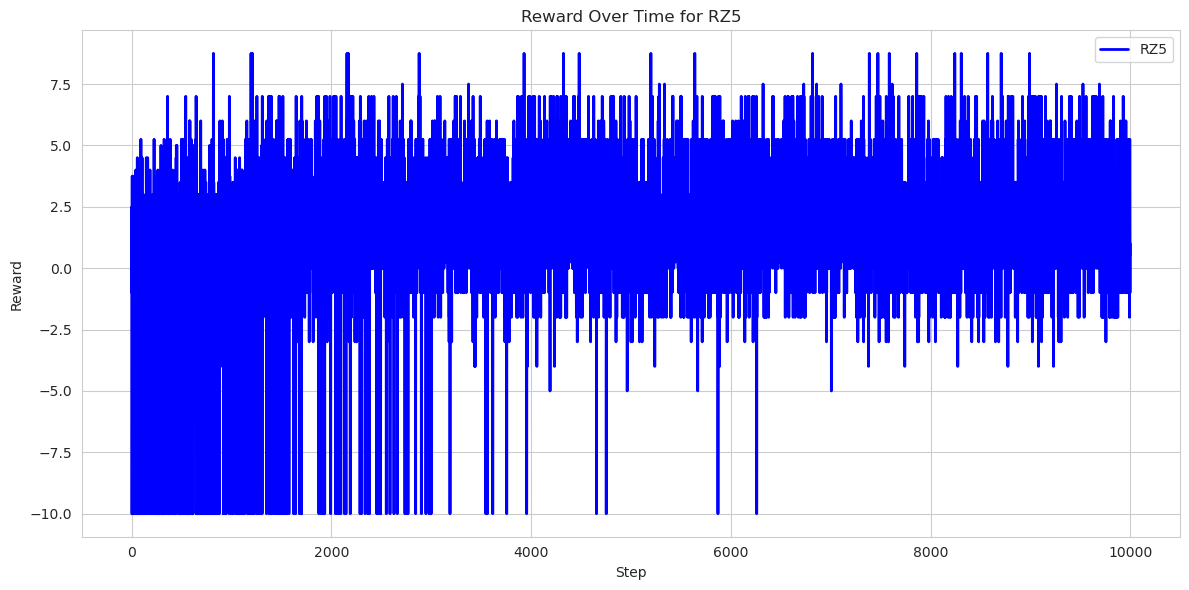

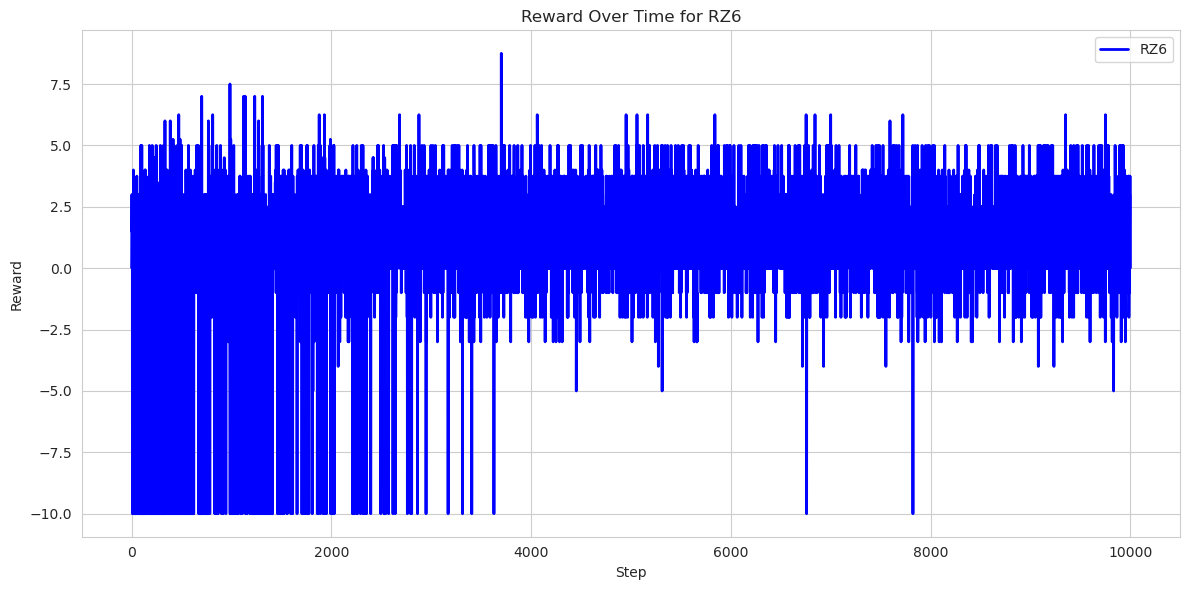

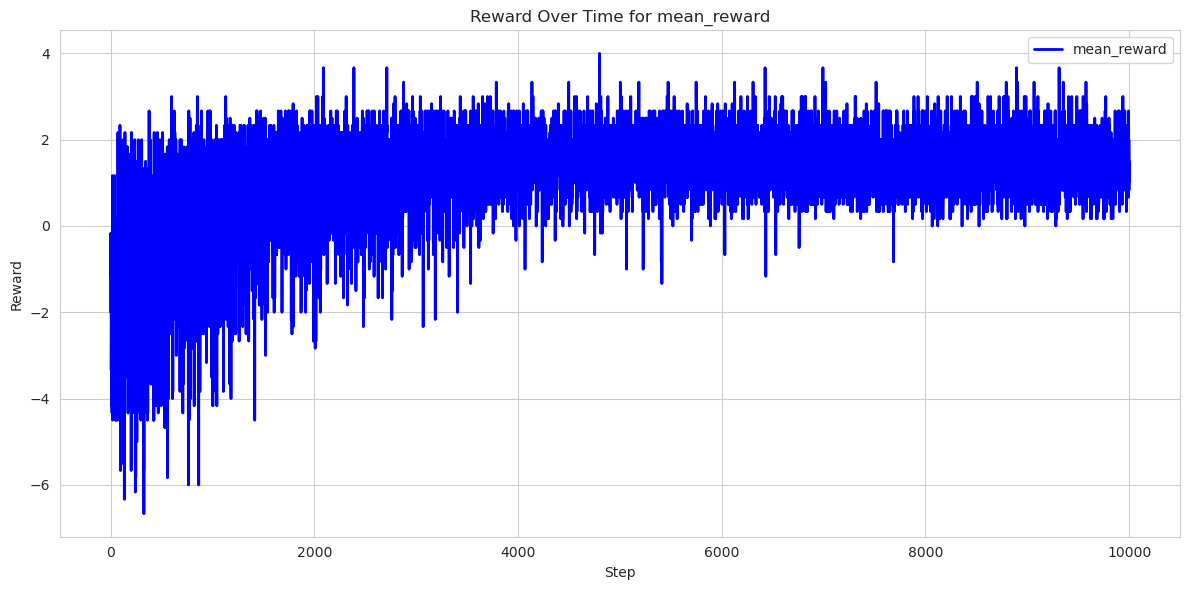

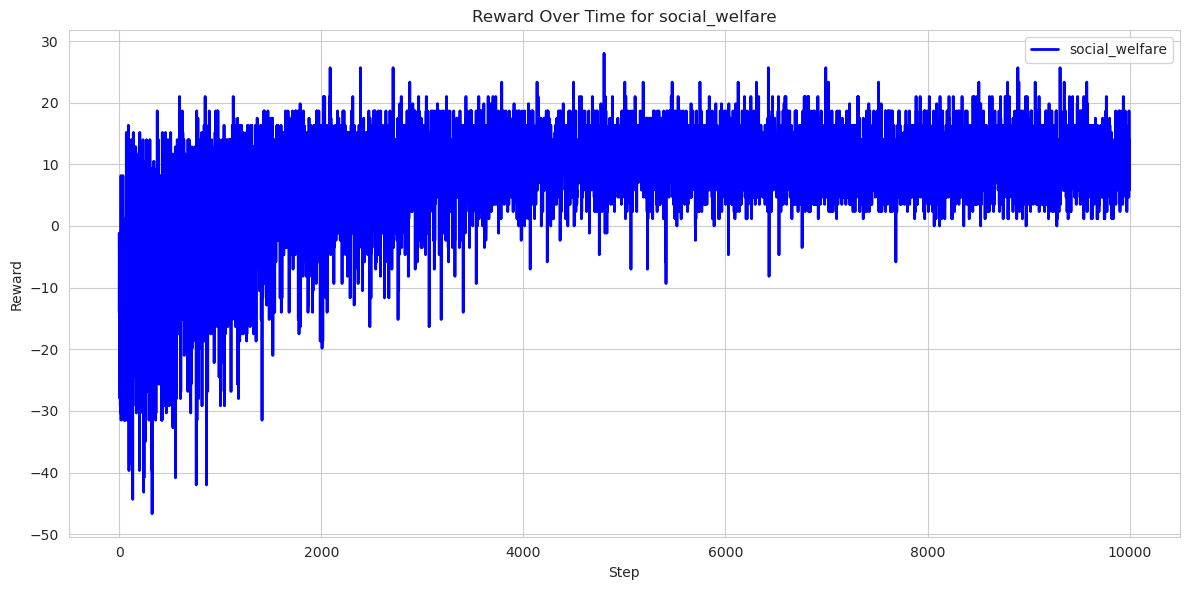

In [7]:
print("Plotting Q-Tables")
for agent in sim_env.agents.values():
    print(f"Agent {agent.name}")
    plot_q_tables(agent)

print("Plotting Rewards")
for agent in sim_env.agents.values():
    plot_reward_for(agent.name, rewards_info)

plot_reward_for("mean_reward", rewards_info)
plot_reward_for("social_welfare", rewards_info)

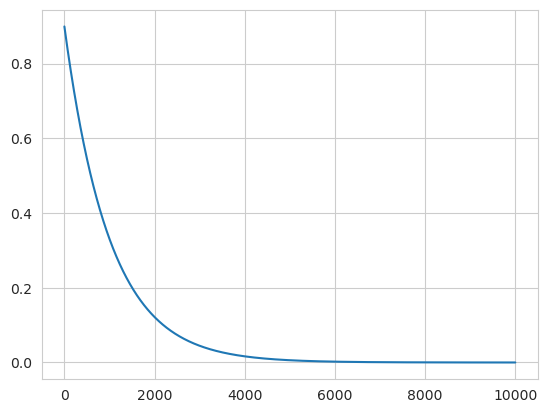

In [8]:
epsilon = 0.9
eps = {}

for step in range(steps):
    epsilon *= 0.999
    eps[step] = epsilon

value = [value for value in eps.values()]

plt.plot(eps.keys(), value)